In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv("D:\\SEMESTER 5\\CSE303 ML\\AirQuality.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_18040\520080068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AirQuality", y=col, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_18040\520080068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AirQuality", y=col, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_18040\520080068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AirQuality", y=col, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_18040\520080068.py:7: FutureWarning

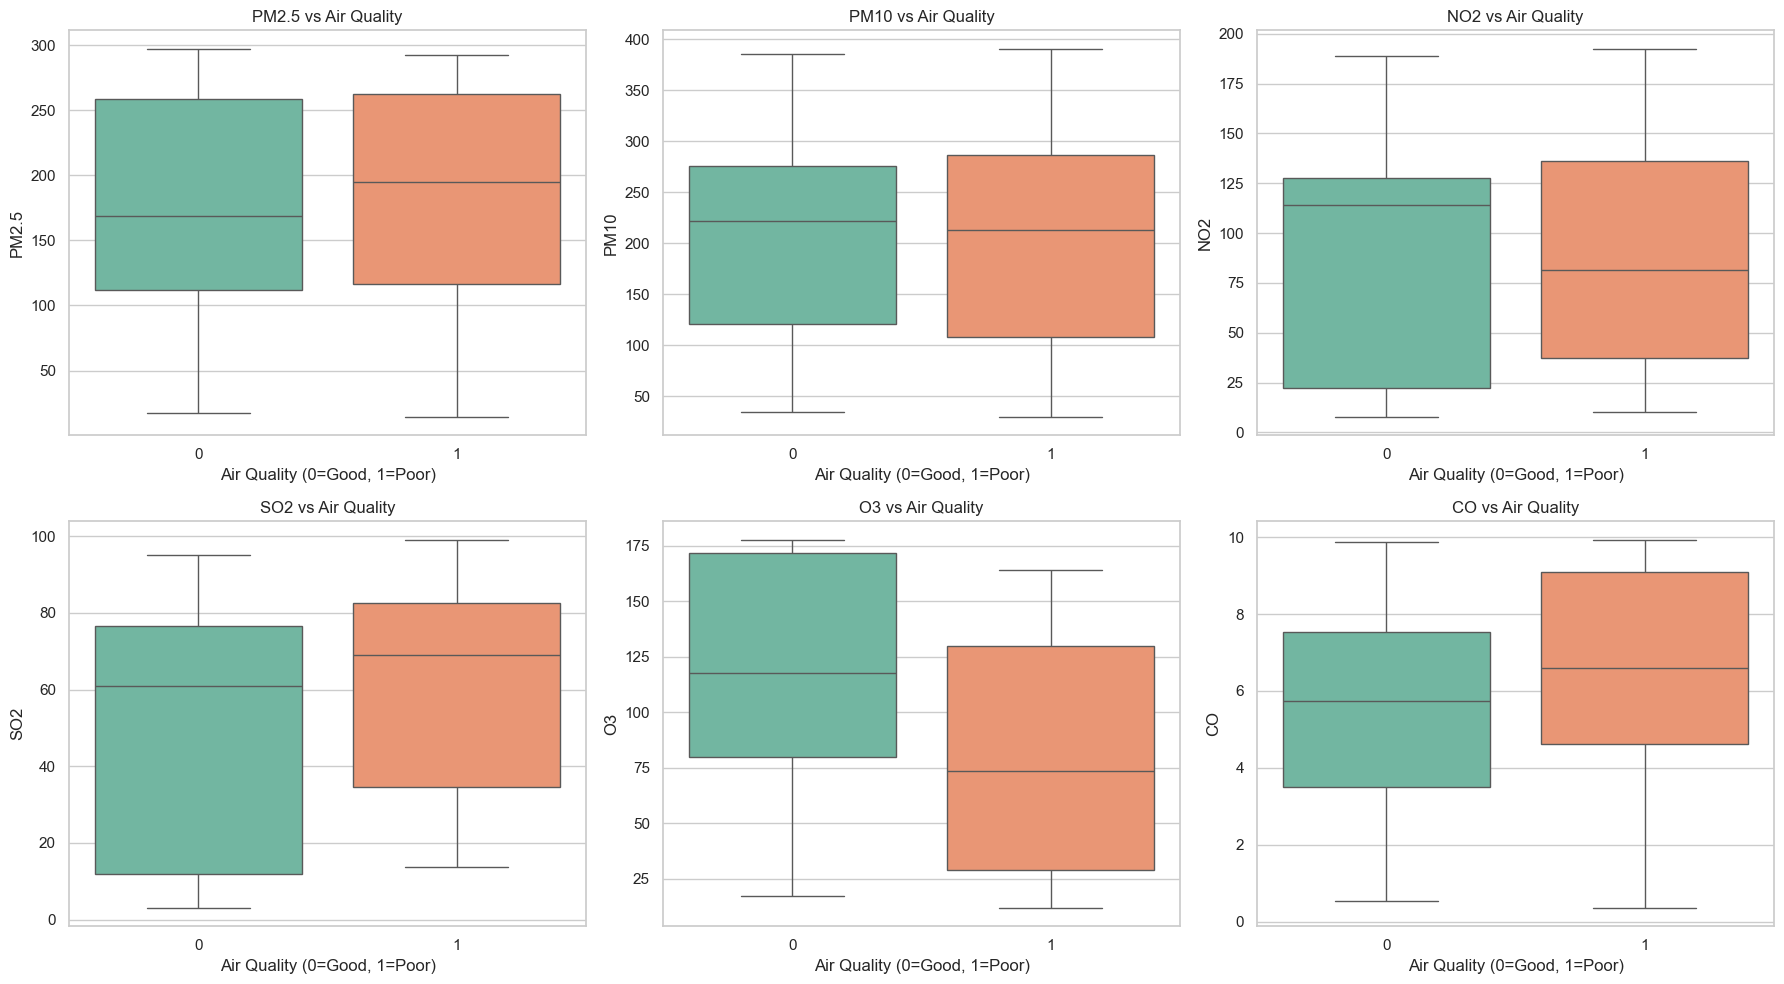

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

pollutants = ["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]
for i, col in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x="AirQuality", y=col, palette="Set2")
    plt.title(f"{col} vs Air Quality")
    plt.xlabel("Air Quality (0=Good, 1=Poor)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

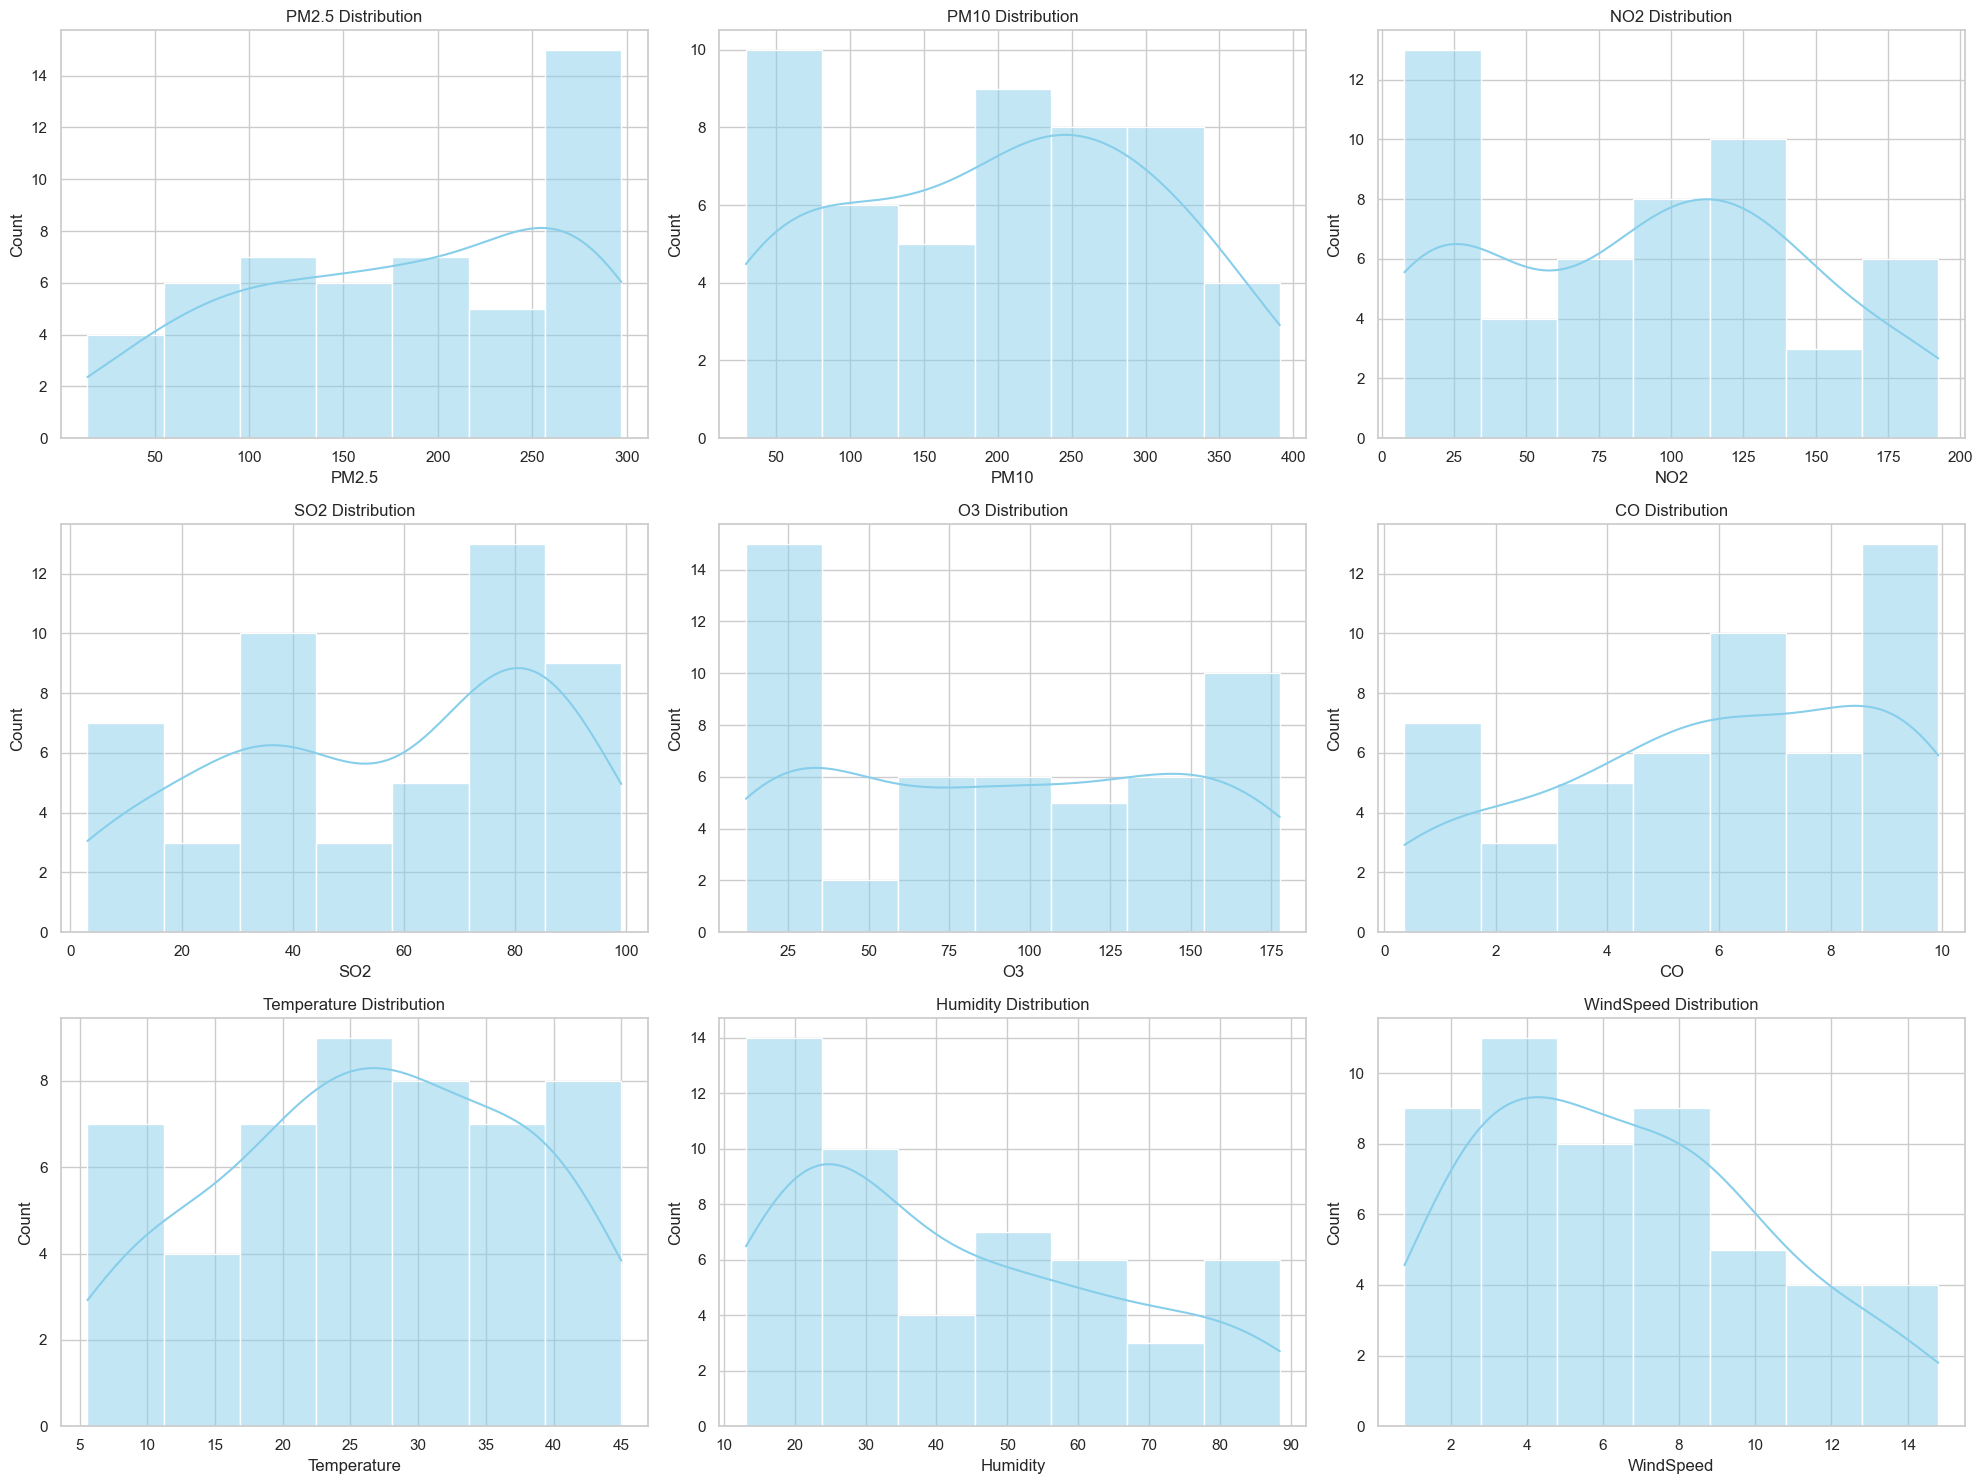

In [9]:
features = ["PM2.5", "PM10", "NO2", "SO2", "O3", "CO", "Temperature", "Humidity", "WindSpeed"]

plt.figure(figsize=(20, 15))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

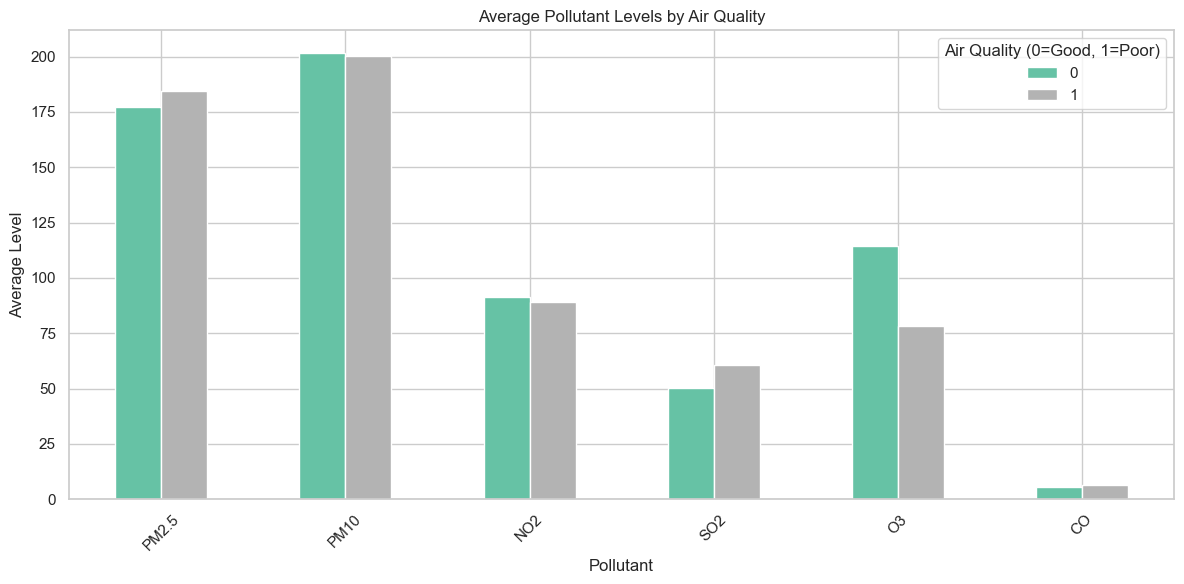

In [10]:
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]

avg_by_quality = df.groupby("AirQuality")[pollutants].mean().T

avg_by_quality.plot(kind="bar", figsize=(12, 6), colormap="Set2")
plt.title("Average Pollutant Levels by Air Quality")
plt.xlabel("Pollutant")
plt.ylabel("Average Level")
plt.xticks(rotation=45)
plt.legend(title="Air Quality (0=Good, 1=Poor)")
plt.tight_layout()
plt.show()


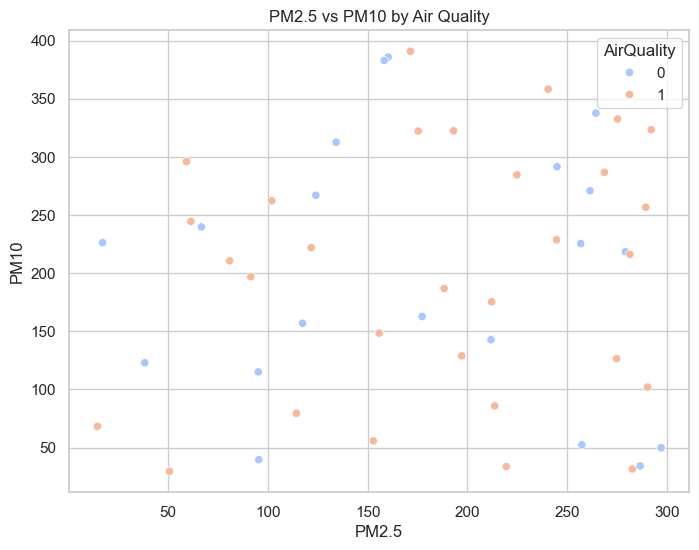

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PM2.5", y="PM10", hue="AirQuality", palette="coolwarm")
plt.title("PM2.5 vs PM10 by Air Quality")
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.show()


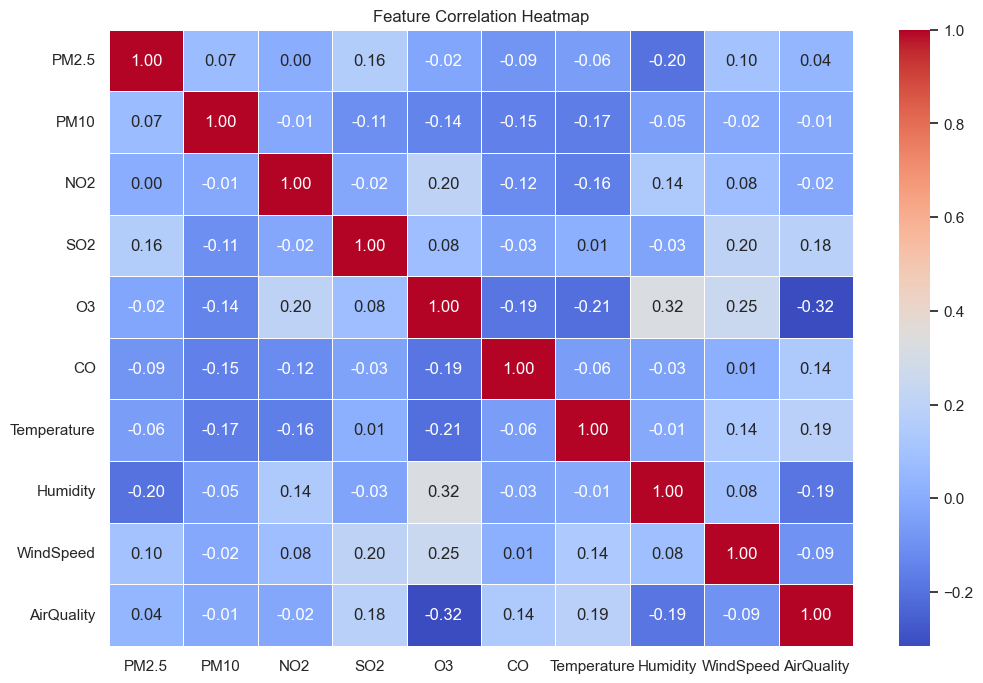

In [12]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


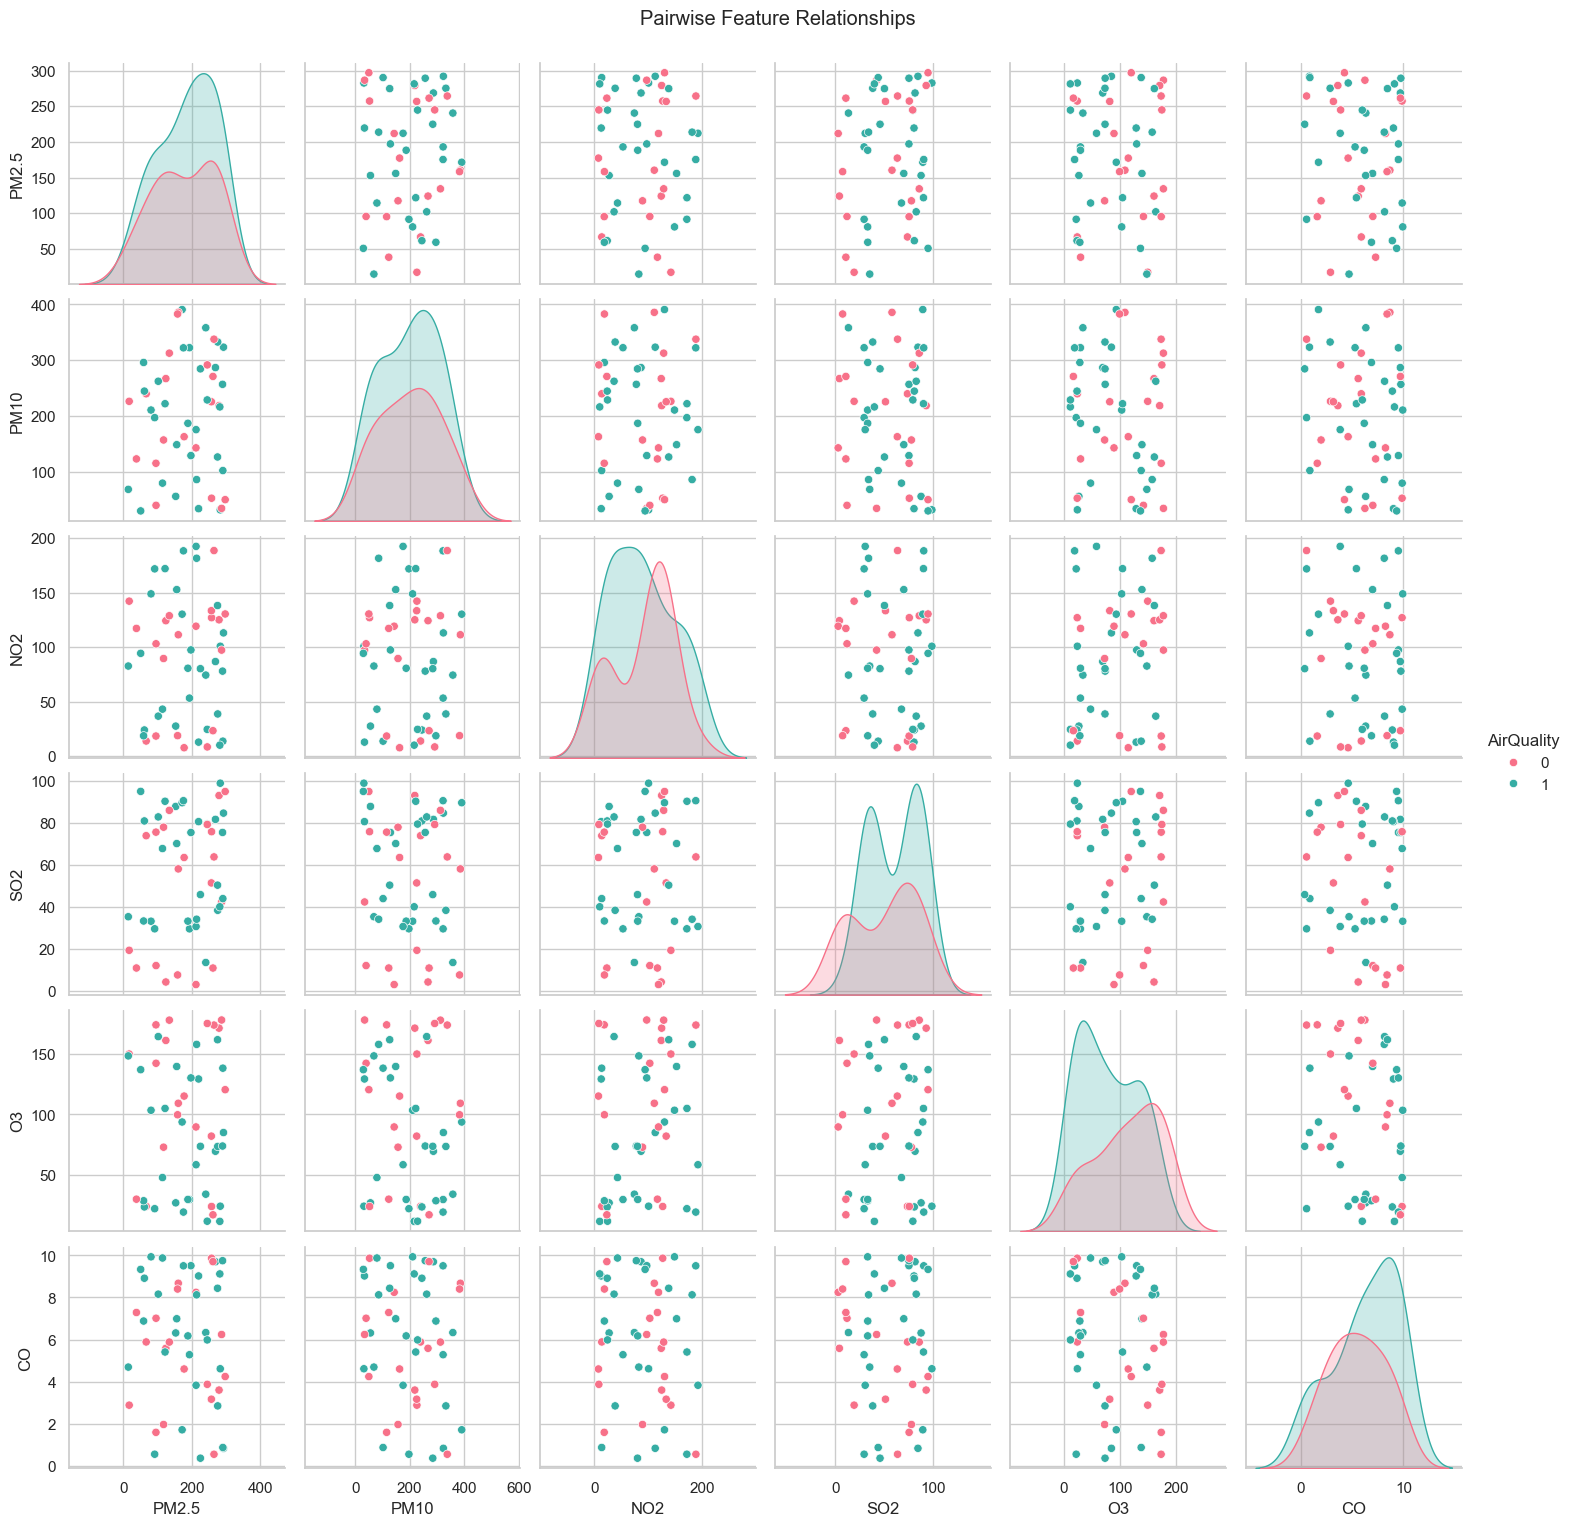

In [13]:
sns.pairplot(df, hue="AirQuality", vars=["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"], palette="husl")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
X = df.drop("AirQuality", axis=1)
y = df["AirQuality"]

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [21]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



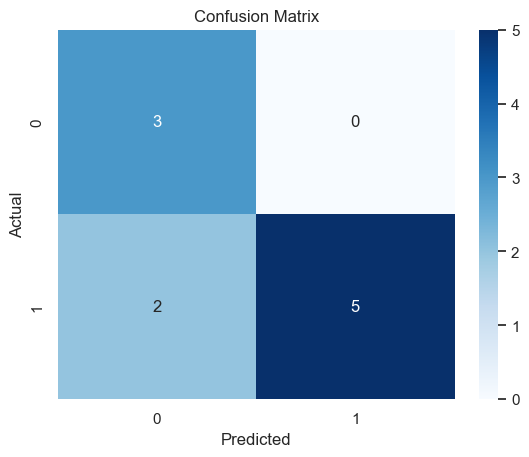

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Key Questions / Analysis / Interpretation to be Evaluated

**Q1. Can you interpret spatial and temporal pollution patterns?**  
- Line plots show trends over time.  
- City-wise comparison reveals most polluted cities.  
- Seasonal variations (winter vs summer) visible.  

**Q2. Can you analyze interdependence among pollutants using correlation matrices?**  
- Heatmaps show correlations among pollutants.  
- Positive correlation → pollutants rise together.  
- Negative correlation → when one is high, another is low.  

**Q3. Can you evaluate data quality and justify handling strategies for missing values?**  
- Missing values reduce data quality.  
- Can be filled (mean/median) or removed.  
- Strategy depends on dataset size and context. 

*Practical 2 — Air quality: winter vs summer comparison (Top 5 cities)*

Load a local CSV named 'air_quality_india.csv'

Top 5 cities by mean PM2.5: ['Mumbai', 'Kolkata', 'Delhi', 'Kanpur', 'Lucknow']


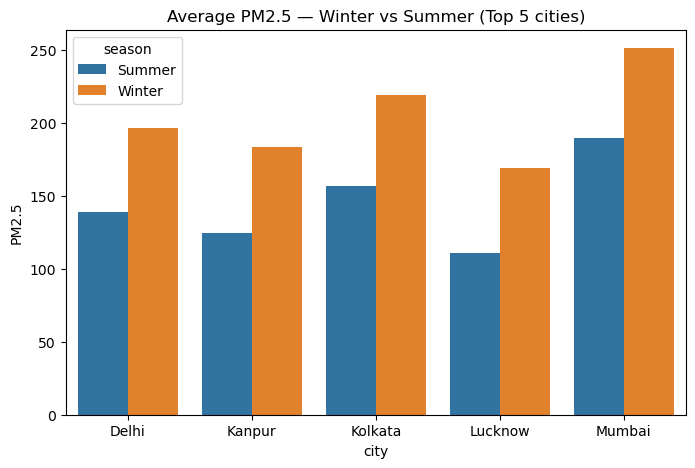

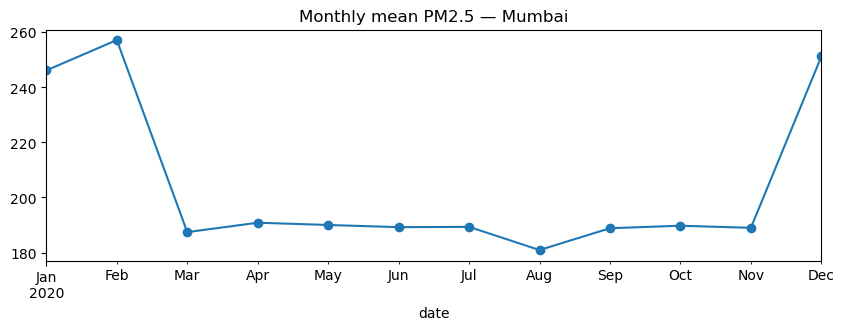

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fn = 'air_quality_india.csv'
if os.path.exists(fn):
    df = pd.read_csv(fn, parse_dates=['date'])
else:
    # synthetic fallback
    rng = pd.date_range('2020-01-01','2020-12-31', freq='D')
    cities = ['Delhi','Mumbai','Kolkata','Chennai','Bengaluru','Lucknow','Kanpur']
    rows = []
    np.random.seed(0)
    for city in cities:
        base = np.random.uniform(60,200)
        for d in rng:
            month = d.month
            seasonal = 60 if month in [12,1,2] else 0
            val = np.abs(np.random.normal(base + seasonal, 25))
            rows.append({'date': d, 'city': city, 'PM2.5': val})
    df = pd.DataFrame(rows)

df['month'] = df['date'].dt.month
df['season'] = df['month'].apply(lambda m: 'Winter' if m in [12,1,2] else ('Summer' if m in [4,5,6] else 'Other'))

city_mean = df.groupby('city')['PM2.5'].mean().sort_values(ascending=False)
top5 = city_mean.head(5).index.tolist()
print('Top 5 cities by mean PM2.5:', top5)

df_top5 = df[df['city'].isin(top5)]
agg = df_top5[df_top5['season'].isin(['Winter','Summer'])].groupby(['city','season'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=agg, x='city', y='PM2.5', hue='season')
plt.title('Average PM2.5 — Winter vs Summer (Top 5 cities)')
plt.show()

# Monthly time series for top city
city = top5[0]
tmp = df_top5[df_top5['city']==city].set_index('date').resample('ME')['PM2.5'].mean()
plt.figure(figsize=(10,3)); tmp.plot(marker='o'); plt.title(f'Monthly mean PM2.5 — {city}'); plt.show()
